#Python Notebook 2: Mortality Status Classifiers, their performances and Hyperparameters optimisations

Seminar session 1 and 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Seminar session 1 and 2

In [2]:
import pandas as pd

data_frame = pd.read_csv('/content/drive/MyDrive/Classification_dataset.csv')

Seminar session 1 and 2

In [3]:
#Check updated unique value counts
print(data_frame["Mortality_Status"].value_counts())

Mortality_Status
0    3408
1     616
Name: count, dtype: int64


Seminar session 1 and 2

In [4]:
data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,68.0,0,0,0,0,1,3,1,4.0,1,1,24.0,1,0
1,50.0,0,1,1,2,0,2,1,35.0,1,1,14.0,5,0
2,58.0,0,2,2,4,0,2,1,63.0,1,1,14.0,7,0
3,58.0,0,0,0,0,1,3,1,18.0,1,1,2.0,1,0
4,47.0,0,1,0,1,1,3,1,41.0,1,1,3.0,1,0


Seminar session 1 and 2

In [5]:
print(data_frame.columns)

Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Mortality_Status'],
      dtype='object')


Seminar session 1 and 2

In [6]:
print(data_frame.shape)

(4024, 14)


Seminar session 1 and 2

In [7]:
#Targeting the 'Mortality_Status'
X = data_frame.drop(columns=["Mortality_Status"])
y = data_frame["Mortality_Status"]

Seminar session 3

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Spliting data for training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print(y_train.value_counts(normalize=True))

Mortality_Status
0    0.846847
1    0.153153
Name: proportion, dtype: float64


In [10]:
print(y_test.value_counts(normalize=True))

Mortality_Status
0    0.847205
1    0.152795
Name: proportion, dtype: float64


Seminar session 3

In [11]:
#Feature scaling for KNN & Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Seminar session 4

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, f1_score, recall_score, precision_score, roc_auc_score

#Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

#Predict
y_pred_nb = nb.predict(X_test)

Seminar session 1, 2, 3, 4

In [13]:
#Performance evaluation
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nb))
print("Naive Bayes F1 score:", f1_score(y_test, y_pred_nb))
print("Naive Bayes Precision score:", precision_score(y_test, y_pred_nb))
print("Naive Bayes ROC-AUC score:", roc_auc_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       682
           1       0.32      0.37      0.35       123

    accuracy                           0.78       805
   macro avg       0.60      0.62      0.61       805
weighted avg       0.80      0.78      0.79       805

Naive Bayes Accuracy: 0.7838509316770186
Naive Bayes Recall: 0.37398373983739835
Naive Bayes F1 score: 0.3458646616541353
Naive Bayes Precision score: 0.32167832167832167
Naive Bayes ROC-AUC score: 0.615877500417233
Naive Bayes Confusion Matrix:
 [[585  97]
 [ 77  46]]


Seminar session 3

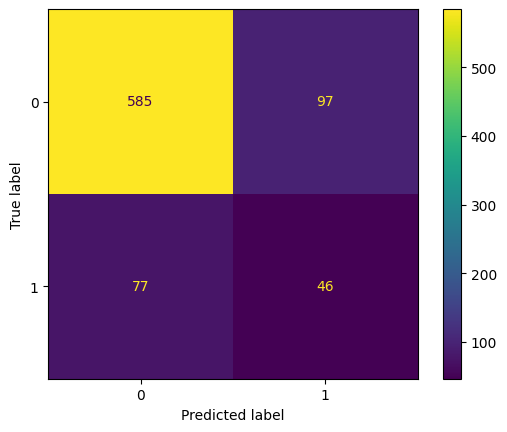

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

#Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)

#Creating display
display = ConfusionMatrixDisplay(cm, display_labels=nb.classes_)
display.plot()

Seminar session 3

In [15]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

#Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    plt.figure(figsize=(8, 6))
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name)
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.legend()
    plt.grid()
    plt.show()

Seminar session 3

<Figure size 800x600 with 0 Axes>

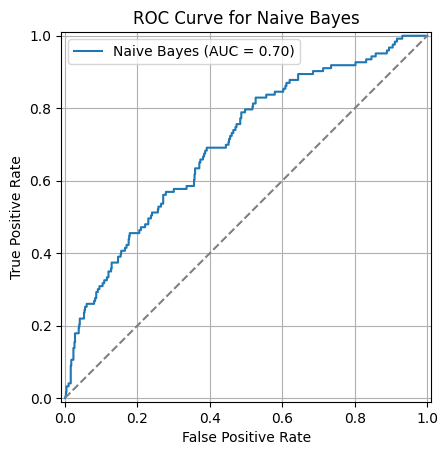

In [16]:
plot_roc_curve(nb, X_test, y_test, "Naive Bayes")

Seminar session 3

In [17]:
from sklearn.linear_model import LogisticRegression

#Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predict
y_pred_logreg = logreg.predict(X_test)

Seminar session 1, 2, 3, 4

In [18]:
#Performance evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_logreg))
print("Logistic Regression F1 score:", f1_score(y_test, y_pred_logreg))
print("Logistic Regression Precision score:", precision_score(y_test, y_pred_logreg))
print("Logistic Regression ROC-AUC score:", roc_auc_score(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       682
           1       0.62      0.12      0.20       123

    accuracy                           0.85       805
   macro avg       0.74      0.55      0.56       805
weighted avg       0.83      0.85      0.81       805

Logistic Regression Accuracy: 0.8546583850931677
Logistic Regression Recall: 0.12195121951219512
Logistic Regression F1 score: 0.20408163265306123
Logistic Regression Precision score: 0.625
Logistic Regression ROC-AUC score: 0.5543773692868894
Logistic Regression Confusion Matrix:
 [[673   9]
 [108  15]]


Seminar session 3

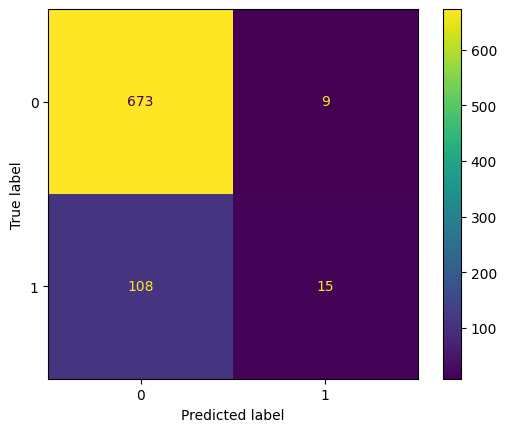

In [19]:
#Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg, labels=logreg.classes_)

#Creating display
display = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
display.plot()

<Figure size 800x600 with 0 Axes>

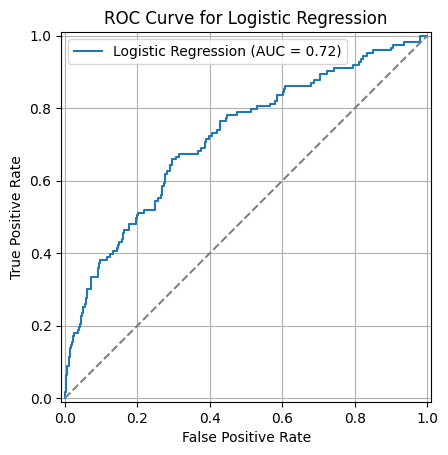

In [20]:
plot_roc_curve(logreg, X_test, y_test, "Logistic Regression")

Seminar session 4

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#Train KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predict
y_pred_knn = knn.predict(X_test)

Seminar session 1, 2, 3, 4

In [22]:
#Performance evaluation
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Recall:", recall_score(y_test, y_pred_knn))
print("KNN F1 score:", f1_score(y_test, y_pred_knn))
print("KNN Precision score:", precision_score(y_test, y_pred_knn))
print("KNN ROC-AUC score:", roc_auc_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       682
           1       0.31      0.14      0.19       123

    accuracy                           0.82       805
   macro avg       0.59      0.54      0.55       805
weighted avg       0.78      0.82      0.79       805

KNN Accuracy: 0.822360248447205
KNN Recall: 0.13821138211382114
KNN F1 score: 0.192090395480226
KNN Precision score: 0.3148148148148148
KNN ROC-AUC score: 0.5419795913501657
KNN Confusion Matrix:
 [[645  37]
 [106  17]]


Seminar session 3

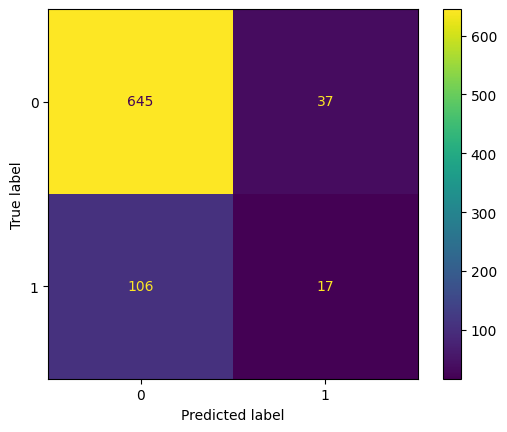

In [23]:
#Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)

#Creating display
display = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
display.plot()

Seminar session 3

<Figure size 800x600 with 0 Axes>

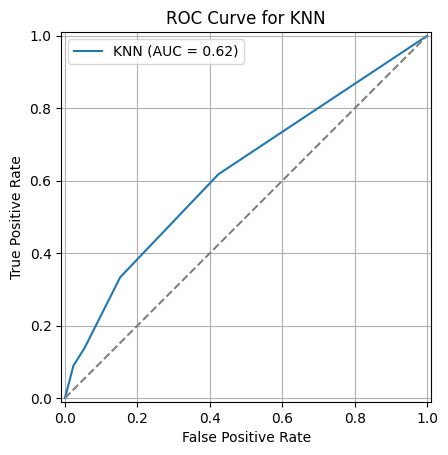

In [24]:
plot_roc_curve(knn, X_test, y_test, "KNN")

Seminar session 4

In [25]:
#Defining hyperparameters
from sklearn.model_selection import GridSearchCV
import numpy as np

#Naive Bayes
#Define the parameter grid
param_grid_nb = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

#Instantiate GridSearchCV
nb_gscv = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')

#Fit to the data
nb_gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])},
             scoring='accuracy')

Seminar session 4

In [26]:
#Logistic Regression
#Define the parameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']
}

#Instantiate GridSearchCV
logreg_gscv = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')

#Fit to the data
logreg_gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

Seminar session 4

In [27]:
#KNN
#Define the parameter grid
param_grid_knn = {
    'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']
}

#Instantiate GridSearchCV
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

#Fit to the data
knn_gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

Seminar session 4

In [28]:
#Print the best parameters
print("Best parameters for Naive Bayes:", nb_gscv.best_params_)
best_nb = nb_gscv.best_estimator_
print("\nBest parameters for Logistic Regression:", logreg_gscv.best_params_)
best_logreg = logreg_gscv.best_estimator_
print("\nBest parameters for KNN:", knn_gscv.best_params_)
best_knn = knn_gscv.best_estimator_

Best parameters for Naive Bayes: {'var_smoothing': np.float64(1.0)}

Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': np.int64(8)}


Seminar session 4

In [29]:
#Predicting with best models
y_pred_best_knn = best_knn.predict(X_test)
y_pred_best_logreg = best_logreg.predict(X_test)
y_pred_best_nb = best_nb.predict(X_test)

Seminar session 1, 2, 3, 4

In [30]:
#Evaluate
print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("KNN Recall:", recall_score(y_test, y_pred_best_knn))
print("KNN F1 score:", f1_score(y_test, y_pred_best_knn))
print("KNN Precision score:", precision_score(y_test, y_pred_best_knn))
print("KNN ROC-AUC score:", roc_auc_score(y_test, y_pred_best_knn))
print("KNN Matrix:\n", confusion_matrix(y_test, y_pred_best_knn))

print("\nOptimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_logreg))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_best_logreg))
print("Logistic Regression F1 score:", f1_score(y_test, y_pred_best_logreg))
print("Logistic Regression Precision score:", precision_score(y_test, y_pred_best_logreg))
print("Logistic Regression ROC-AUC score:", roc_auc_score(y_test, y_pred_best_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_logreg))

print("\nOptimized Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_best_nb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_best_nb))
print("Naive Bayes F1 score:", f1_score(y_test, y_pred_best_nb))
print("Naive Bayes Precision score:", precision_score(y_test, y_pred_best_nb))
print("Naive Bayes ROC-AUC score:", roc_auc_score(y_test, y_pred_best_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_nb))

Optimized KNN Accuracy: 0.8409937888198757
KNN Recall: 0.0975609756097561
KNN F1 score: 0.15789473684210525
KNN Precision score: 0.41379310344827586
KNN ROC-AUC score: 0.5363171446963737
KNN Matrix:
 [[665  17]
 [111  12]]

Optimized Logistic Regression Accuracy: 0.853416149068323
Logistic Regression Recall: 0.08943089430894309
Logistic Regression F1 score: 0.15714285714285714
Logistic Regression Precision score: 0.6470588235294118
Logistic Regression ROC-AUC score: 0.5403166201749994
Logistic Regression Confusion Matrix:
 [[676   6]
 [112  11]]

Optimized Naive Bayes Accuracy: 0.831055900621118
Naive Bayes Recall: 0.2764227642276423
Naive Bayes F1 score: 0.3333333333333333
Naive Bayes Precision score: 0.41975308641975306
Naive Bayes ROC-AUC score: 0.603753904107956
Naive Bayes Confusion Matrix:
 [[635  47]
 [ 89  34]]


Seminar session 1, 2, 3

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#User defined function to display confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Alive', 'Dead'])
    display.plot(cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Seminar session 3

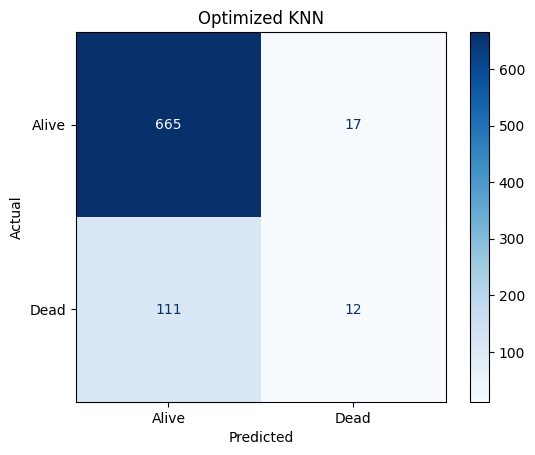

In [32]:
#Plot for each model
plot_confusion_matrix(y_test, y_pred_best_knn, "Optimized KNN")


Seminar session 3

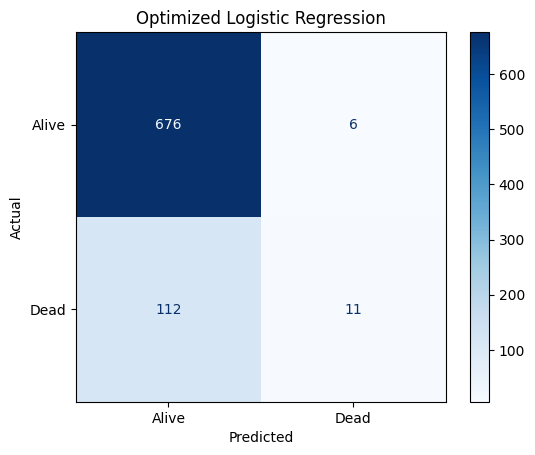

In [33]:
plot_confusion_matrix(y_test, y_pred_best_logreg, "Optimized Logistic Regression")


Seminar session 3

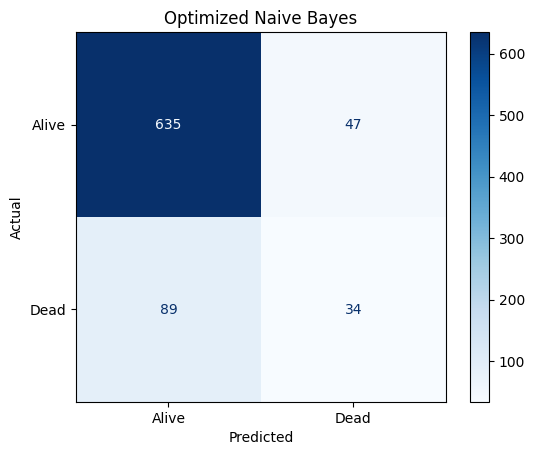

In [34]:
plot_confusion_matrix(y_test, y_pred_best_nb, "Optimized Naive Bayes")

Seminar session 3

In [35]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

#Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    plt.figure(figsize=(8, 6))
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name)
    plt.title(f"ROC Curve for Optimized {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.legend()
    plt.grid()
    plt.show()

Seminar session 3

<Figure size 800x600 with 0 Axes>

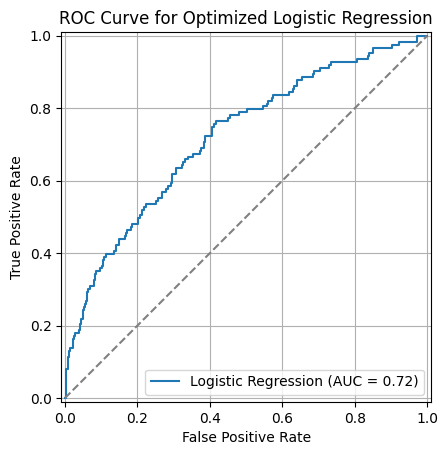

In [36]:
plot_roc_curve(best_logreg, X_test, y_test, "Logistic Regression")

Seminar session 3

<Figure size 800x600 with 0 Axes>

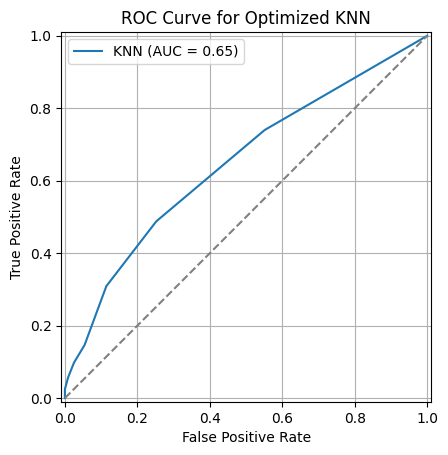

In [37]:
plot_roc_curve(best_knn, X_test, y_test, "KNN")

Seminar session 3

<Figure size 800x600 with 0 Axes>

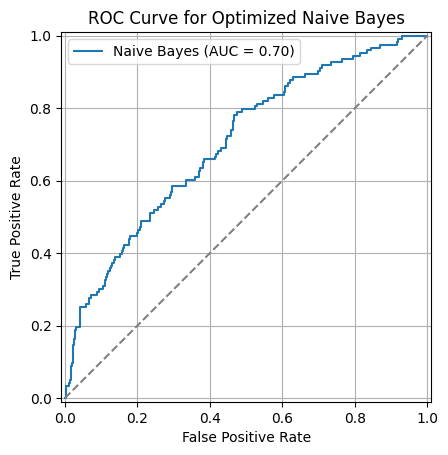

In [38]:
plot_roc_curve(best_nb, X_test, y_test, "Naive Bayes")